In [3]:
import sklearn
sklearn.__version__

'0.20.0'

Warning: if you are using Scikit-Learn ≤ 0.19, the SVC class will use the One-vs-One (OvO) strategy by default, so you must explicitly set decision_function_shape="ovr" if you want to use the OvR strategy instead (OvR is the default since 0.19).

#_svm_clf = SVC(decision_function_shape="ovr", gamma="auto")   when sklearn.__version__<=0.19

In [6]:
import sys  
sys.version

'3.5.4 |Continuum Analytics, Inc.| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]'

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file = "iris_tree.dot",
        feature_names = iris.feature_names[2:],
        class_names =iris.target_names,
        rounded = True,
        filled = True
    )

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],"bs",label="Iris-Setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],"y^",label="Iris-Versicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],"ro",label="Iris-Virginica")
        plt.axis(axes)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

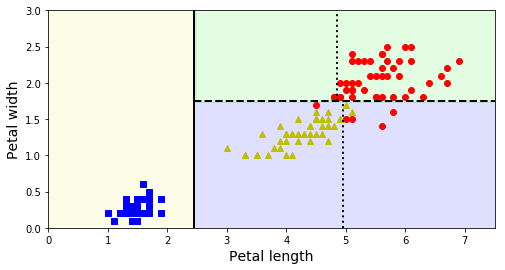

In [62]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)